In [ ]:
#Code to generate parameters for Gillespie simulations - positive regulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Estimating parameters


## $k_{on}$

Data source:

- Larsson et al, 2019
- Ramsköld et al, 2024
- Halpern et al, 2015


In [45]:
ramskold_2024_fib_1

,Gene_ID,Final_ML_kon,Final_ML_ksyn,Final_ML_koff,ML_no_error,Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output,Initial_lookup_kon,Initial_lookup_ksyn,Initial_lookup_koff,Bootstrap_lookup_kon_95%conf_high,...,Fraction_new_RNA,Number_expressing_cells,Fraction_expressing_cells,Average_count_in_expressing_cells,Coefficient_of_variation_in_expressing_cells,Average_expression,ML_derived_burst_size,ML_derived_burst_frequency_per_hour,ML_derived_mean_occupancy,ML_derived_expression_rate_per_hour
0,ENSMUSG00000000001.5,3.583177,14.091537,29.816341,True,True,3.274785,13.968539,29.873350,3.976354,...,0.184265,3880,0.870345,3.211856,0.628839,2.795424,0.472611,3.198765,0.107282,1.511772
2,ENSMUSG00000000028.16,0.239337,130.154735,284.740516,True,True,0.238690,130.154742,284.740514,0.274737,...,0.178360,597,0.133917,1.515913,0.631497,0.203006,0.457099,0.239136,0.000840,0.109309
5,ENSMUSG00000000049.12,0.029581,56.467350,332.822432,True,True,0.033318,1.773209,9.712361,0.931949,...,0.082677,36,0.008075,1.166667,0.377964,0.009421,0.169662,0.029578,0.000089,0.005018
6,ENSMUSG00000000056.8,0.680442,8.223780,34.557718,True,True,0.638870,8.567419,34.474382,0.821417,...,0.376221,961,0.215568,1.363163,0.528222,0.293854,0.237972,0.667303,0.019310,0.158800
7,ENSMUSG00000000058.7,1.046006,9.470033,30.086241,True,True,0.974227,9.886441,29.947895,1.121353,...,0.217265,1658,0.371916,1.580217,0.635458,0.587707,0.314763,1.010861,0.033599,0.318182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37185,ENSMUSG00002076600.1,0.016460,16.556835,126.072292,True,True,0.050807,11.408538,106.301151,3.001373,...,0.486486,16,0.003589,1.125000,0.293972,0.004038,0.131328,0.016458,0.000131,0.002161
37217,ENSMUSG00002076792.1,0.043738,10.330398,107.404607,True,True,0.067312,15.191827,186.663201,0.867239,...,0.760870,32,0.007178,1.093750,0.266497,0.007851,0.096182,0.043720,0.000407,0.004205
37227,ENSMUSG00002076839.1,0.144203,2.758248,97.196081,True,True,0.207373,4.186971,162.154320,3.001373,...,0.211180,33,0.007402,1.030303,0.166378,0.007627,0.028378,0.143989,0.001481,0.004086
37229,ENSMUSG00002076870.1,0.000712,1.167415,0.571290,True,True,0.007092,1.153958,0.581730,3.001373,...,0.208333,3,0.000673,1.666667,0.565685,0.001122,2.043472,0.000711,0.001245,0.001453


In [3]:
ramskold_2024_fib_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_mousefibroblasts_datahalf1_kinetic_estimates.xlsx")
ramskold_2024_fib_1 = ramskold_2024_fib_1[(ramskold_2024_fib_1['ML_no_error']) & (ramskold_2024_fib_1['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_fib_1['ML_derived_burst_frequency_per_hour'].dropna()
print("Fib 1")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_fib_1 = k_on

Fib 1
Mean: 1.0104814368573711
1st Quartile: 0.07373985735984104
Median: 0.7420735949493393
3rd Quartile: 1.676419183125378
Standard Deviation: 1.124659578479667
Minimum: 0.0001312710308114655
Maximum: 36.49180849756235


In [4]:
ramskold_2024_fib_2 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_mousefibroblasts_datahalf2_kinetic_estimates.xlsx")
ramskold_2024_fib_2 = ramskold_2024_fib_2[(ramskold_2024_fib_2['ML_no_error']) & (ramskold_2024_fib_2['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_fib_2['ML_derived_burst_frequency_per_hour'].dropna()
print("Fib 2")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_fib_2 = k_on

Fib 2
Mean: 1.0321422879138198
1st Quartile: 0.06929247706444529
Median: 0.75253835705696
3rd Quartile: 1.679605167048039
Standard Deviation: 1.2538736572290723
Minimum: 0.0001371805965726848
Maximum: 33.60957781615014


In [5]:
ramskold_2024_k562_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_K562_datahalf1_kinetic_estimates.xlsx")
ramskold_2024_k562_1 = ramskold_2024_k562_1[(ramskold_2024_k562_1['ML_no_error']) & (ramskold_2024_k562_1['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_k562_1['ML_derived_burst_frequency_per_hour'].dropna()
print("c562 1")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_c562_1 = k_on

c562 1
Mean: 1.7486626902709819
1st Quartile: 0.6212398494196723
Median: 1.2725722649316267
3rd Quartile: 2.186065373359897
Standard Deviation: 2.775902971643924
Minimum: 0.001105789532173987
Maximum: 39.0930513048507


In [12]:
ramskold_2024_k562_2

,Gene_ID,Final_ML_kon,Final_ML_ksyn,Final_ML_koff,ML_no_error,Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output,Initial_lookup_kon,Initial_lookup_ksyn,Initial_lookup_koff,Bootstrap_lookup_kon_95%conf_high,...,Fraction_new_RNA,Number_expressing_cells,Fraction_expressing_cells,Average_count_in_expressing_cells,Coefficient_of_variation_in_expressing_cells,Average_expression,ML_derived_burst_size,ML_derived_burst_frequency_per_hour,ML_derived_mean_occupancy,ML_derived_expression_rate_per_hour
3,ENSG00000000457,1.398359,10.662099,49.841237,True,True,4.277618,1.070875,50.643716,39.437984,...,0.652542,62,0.201954,1.241935,0.426204,0.250814,0.213921,1.360197,0.027291,0.290975
6,ENSG00000000971,0.636443,126.226819,63.243632,True,True,0.555047,97.741724,92.343809,0.713643,...,0.260700,131,0.426710,2.557252,0.916967,1.091205,1.995882,0.630102,0.009963,1.257609
7,ENSG00000001036,1.054014,16.808786,44.449399,True,True,0.735352,11.408538,45.683236,21.144372,...,0.108765,76,0.247557,1.355263,0.606854,0.335505,0.378156,1.029599,0.023163,0.389349
8,ENSG00000001084,0.693966,256.280914,284.554614,True,True,0.555047,173.316534,327.777734,0.920480,...,0.694561,96,0.312704,1.729167,0.885276,0.540717,0.900639,0.692278,0.002433,0.623492
9,ENSG00000001167,0.667130,1.443748,0.665678,True,True,15.719759,1.101786,66.567813,30.130112,...,0.646288,100,0.325733,1.480000,0.509945,0.482085,2.168838,0.333202,0.500545,0.722660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31112,ENSG00000285838,0.938227,11.295698,7.928981,True,True,0.846404,15.191827,22.599870,1.107057,...,0.540870,145,0.472313,2.144828,0.696897,1.013029,1.424609,0.838954,0.105809,1.195182
31134,ENSG00000285875,1.393209,1050.235098,910.898186,True,True,1.121353,23.344254,34.474382,1.485619,...,0.477044,180,0.586319,2.366667,0.772597,1.387622,1.152967,1.391082,0.001527,1.603870
31148,ENSG00000285899,0.386261,23.357980,26.050929,True,True,0.316228,15.191827,29.947895,0.762719,...,0.461538,56,0.182410,1.607143,0.618640,0.293160,0.896627,0.380617,0.014611,0.341272
31168,ENSG00000285953,0.686417,33.392244,66.015288,True,True,0.555047,20.229726,69.686301,22.997568,...,0.623288,64,0.208469,1.421875,0.539134,0.296417,0.505826,0.679353,0.010291,0.343634


In [6]:
ramskold_2024_k562_2 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/ramskold_K562_datahalf2_kinetic_estimates.xlsx")
ramskold_2024_k562_2 = ramskold_2024_k562_2[(ramskold_2024_k562_2['ML_no_error']) & (ramskold_2024_k562_2['Lookup_successful__if_false_then_ML_is_likely_to_produce_nonsense_output'])]
k_on = ramskold_2024_k562_2['ML_derived_burst_frequency_per_hour'].dropna()
print("c562 2")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_ramskold_c562_2 = k_on

c562 2
Mean: 1.713047274609331
1st Quartile: 0.5984529084432129
Median: 1.220179197632962
3rd Quartile: 2.094331987623872
Standard Deviation: 3.1309180798434992
Minimum: 0.001106449070156549
Maximum: 122.857627756417


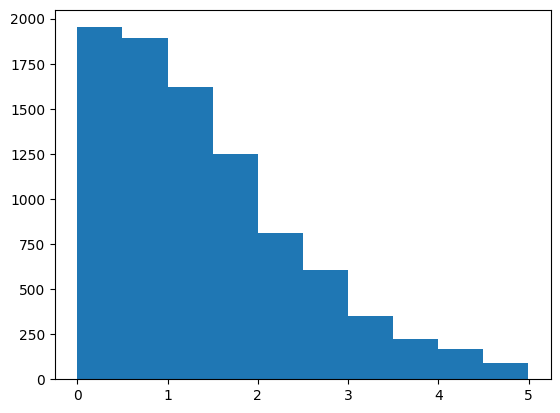

In [16]:
plt.hist(k_on_ramskold_c562_2[k_on_ramskold_c562_2 < 5])
plt.show()

In [10]:
# Limits used in larsson_2019_supp_table_3 for sanity filter
# kon = np.array(est_params)[:,0]
# koff = np.array(est_params)[:,1]
# ksyn = np.array(est_params)[:,2]
# which_kon = ~(kon < 2*1e-3)*~(kon > 1e3 - 1)
# which_koff = ~(koff < 2*1e-3)*~(koff > 1e3 - 1)
# which_burst = ksyn/koff > 1
# which_ksyn = ksyn > 1
# which = which_burst*which_koff*which_kon*which_ksyn


In [7]:
def get_decay_es(index):
    DR_ES = pd.read_csv('/home/mzo5929/Keerthana/grnInference/parameter_data/larsson_slam_seq_data.csv', sep=';')
    DR_ES.index = DR_ES['Name']

    DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]

    DR_ES = DR_ES.dropna(how='any')

    DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']


    DR_ES_scRNA = DR_ES.reindex(index)
    decay_ES = DR_ES_scRNA['decay']
    decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
    decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
    decay_ES = decay_ES[decay_ES > 0]
    decay_ES = decay_ES.dropna()
    return decay_ES

In [8]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_ES_c57b16 = k_on

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()

print("CAST ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_ES_cast = k_on

C57 ALLELE
Mean: 0.20596863397509274
1st Quartile: 0.06716779331127506
Median: 0.13085365370637642
3rd Quartile: 0.22200547915191213
Standard Deviation: 1.843503182642751
Minimum: 0.0005711495551356789
Maximum: 109.5328354708063
CAST ALLELE
Mean: 0.1667408067312676
1st Quartile: 0.06632150448098165
Median: 0.12882434192543946
3rd Quartile: 0.21441689188305957
Standard Deviation: 0.18584514357262674
Minimum: 0.00038916208147576876
Maximum: 6.265822048945427


In [17]:
# Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOn'] < (1e3 - 1))]['kOn'].dropna()


decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
k_on = (k_on_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_Fib_c57b16 = k_on

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
k_on_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOn'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOn'] < (1e3 - 1))]['kOn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
k_on = (k_on_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_larsson_Fib_cast = k_on

C57 ALLELE
Mean: 0.1335304672296609
1st Quartile: 0.06036726742651073
Median: 0.10997276867126132
3rd Quartile: 0.17468754222604926
Standard Deviation: 0.11240275328442897
Minimum: 0.0001946294691895875
Maximum: 1.281125808162066
CAST ALLELE
Mean: 0.13093967842275828
1st Quartile: 0.05771800391528113
Median: 0.1077028926581953
3rd Quartile: 0.17257307127448016
Standard Deviation: 0.10953479712417086
Minimum: 0.00028271660005847087
Maximum: 1.395213667114097


In [18]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
k_on = halpern['Kon(1/hr)']
print("Halpern")
print("Mean:", k_on.mean())
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())
k_on_halpern = k_on

Halpern
Mean: 0.35886363636363644
1st Quartile: 0.06825
Median: 0.118
3rd Quartile: 0.595
Standard Deviation: 0.42864796250253634
Minimum: 0.001
Maximum: 1.32


In [20]:
#Merge the all the lists to calculate the combined stats
k_on = pd.concat([k_on_halpern, k_on_ramskold_fib_2, k_on_ramskold_c562_2, k_on_ramskold_c562_1, k_on_ramskold_fib_1, k_on_larsson_Fib_cast, k_on_larsson_Fib_c57b16, k_on_larsson_ES_cast, k_on_larsson_ES_c57b16], ignore_index=True)
print("Mean:", k_on.mean())
print("5th Percentile:", k_on.quantile(0.05))
print("1st Quartile:", k_on.quantile(0.25))
print("Median:", k_on.median())
print("3rd Quartile:", k_on.quantile(0.75))
print("95th Percentile:", k_on.quantile(0.95))
print("Standard Deviation:", k_on.std())
print("Minimum:", k_on.min())
print("Maximum:", k_on.max())

Mean: 1.0391029410088914
5th Percentile: 0.01100183312142585
1st Quartile: 0.09705559377128055
Median: 0.5474154439351583
3rd Quartile: 1.561003938486209
95th Percentile: 3.17445158980805
Standard Deviation: 1.9415568108366754
Minimum: 0.0001312710308114655
Maximum: 122.857627756417


## $k_{off}$

Data source:

- Larsson et al, 2019
- Halpern et al, 2015


In [22]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_off = halpern['Koff(1/hr)']
print("Halpern")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_halpern = k_off

Halpern
Mean: 0.5790454545454545
1st Quartile: 0.09275
Median: 0.219
3rd Quartile: 0.7025
Standard Deviation: 0.8575255918587157
Minimum: 0.021
Maximum: 3.365


In [23]:
# Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_c57b16['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
k_off = (k_off_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_Fib_c57b16 = k_off

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_1_cast['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
k_off = (k_off_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_Fib_cast = k_off

C57 ALLELE
Mean: 15.202601683205703
1st Quartile: 0.45526228212938696
Median: 2.2617267821792226
3rd Quartile: 17.857039886420385
Standard Deviation: 31.329858288807074
Minimum: 0.0006013023819136663
Maximum: 462.6081591462082
CAST ALLELE
Mean: 14.141586491991884
1st Quartile: 0.41751385884275094
Median: 1.8433326091467346
3rd Quartile: 17.034755395993237
Standard Deviation: 28.80028362274809
Minimum: 0.0014490302964366027
Maximum: 391.24652852939187


In [24]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_c57b16['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_off = (k_off_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_ES_c57b16 = k_off

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['ksyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
k_off_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kOff'] > 2*1e-3) & (larsson_2019_supp_table_3_cast['kOff'] < (1e3 - 1))]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
k_off = (k_off_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", k_off.mean())
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())
k_off_larsson_ES_cast = k_off

C57 ALLELE
Mean: 7.6507489702074585
1st Quartile: 0.20049290568489064
Median: 0.528443175840146
3rd Quartile: 3.0905488613106504
Standard Deviation: 22.336150731702347
Minimum: 0.0006941868440285932
Maximum: 377.07727049121166
CAST ALLELE
Mean: 7.203222856411614
1st Quartile: 0.16444029674815533
Median: 0.43838517805972876
3rd Quartile: 1.8834455747171346
Standard Deviation: 21.651394626517895
Minimum: 0.0003089749088504827
Maximum: 336.34972733166285


In [25]:
#Merge the all the lists to calculate the combined stats
k_off = pd.concat([k_off_halpern, k_off_larsson_Fib_cast, k_off_larsson_Fib_c57b16, k_off_larsson_ES_cast, k_off_larsson_ES_c57b16], ignore_index=True)
print("Mean:", k_off.mean())
print("5th percentile:", k_off.quantile(0.05))
print("1st Quartile:", k_off.quantile(0.25))
print("Median:", k_off.median())
print("3rd Quartile:", k_off.quantile(0.75))
print("95th percentile:", k_off.quantile(0.95))
print("Standard Deviation:", k_off.std())
print("Minimum:", k_off.min())
print("Maximum:", k_off.max())

Mean: 11.179508463056147
5th percentile: 0.062174882445548134
1st Quartile: 0.26821203591274867
Median: 0.8694127714356753
3rd Quartile: 9.606528055691708
95th percentile: 55.50518427748999
Standard Deviation: 26.74850678074887
Minimum: 0.0003089749088504827
Maximum: 462.6081591462082


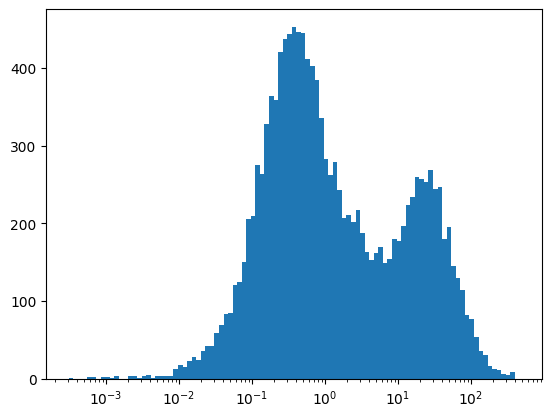

In [140]:
import numpy as np

# Define logarithmic bins
bins = np.logspace(np.log10(k_off.min()), np.log10(k_off.max()), 100)

# Plot histogram
plt.hist(k_off, bins=bins)
plt.xscale('log')
plt.show()

## mRNA production rate

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011
- Larsson et al, 2019
- Halpern et al, 2015


In [27]:
hauser_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/hausser2019central.ods', 'H__sapiens_rates')
hauser_prod_m = hauser_prod_m.dropna()
k_syn_mRNA = hauser_prod_m['mRNA/h']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_hauser = k_syn_mRNA

Mean: 1.5900224938916907
1st Quartile: 0.3621236921704073
Median: 0.731865584320867
3rd Quartile: 1.5567303452237757
Standard Deviation: 3.6979052446592164
Minimum: 0.016568613609091048
Maximum: 117.51217943018719


In [28]:
schwan_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_prod_m =  schwan_prod_m.dropna()
k_syn_mRNA = schwan_prod_m['transcription rate (vsr) experiment [molecules/(cell*h)]']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_schwan_1 = k_syn_mRNA

k_syn_mRNA = schwan_prod_m['transcription rate (vsr) replicate [molecules/(cell*h)]']
print("Mean:", k_syn_mRNA.mean())
print("1st Quartile:", k_syn_mRNA.quantile(0.25))
print("Median:", k_syn_mRNA.median())
print("3rd Quartile:", k_syn_mRNA.quantile(0.75))
print("Standard Deviation:", k_syn_mRNA.std())
print("Minimum:", k_syn_mRNA.min())
print("Maximum:", k_syn_mRNA.max())
k_syn_mRNA_schwan_2 = k_syn_mRNA

Mean: 4.146621853546911
1st Quartile: 1.15
Median: 2.07
3rd Quartile: 3.88
Standard Deviation: 13.315582084109296
Minimum: 0.08
Maximum: 571.92
Mean: 3.507431350114417
1st Quartile: 0.98
Median: 1.78
3rd Quartile: 3.31
Standard Deviation: 13.172891287552766
Minimum: 0.07
Maximum: 651.73


In [29]:
# Supplementary Table 1 Transcriptional burst kinetics inferred in Fibroblasts for C57Bl6 and CAST alleles. 

larsson_2019_supp_table_1 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_1.xlsx", sheet_name=None)
larsson_2019_supp_table_1_c57b16 = larsson_2019_supp_table_1['C57']
larsson_2019_supp_table_1_c57b16.index = larsson_2019_supp_table_1_c57b16['Gene']
larsson_2019_supp_table_1_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['Koff'], errors='coerce')
larsson_2019_supp_table_1_c57b16['kSyn'] = pd.to_numeric(larsson_2019_supp_table_1_c57b16['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_1_c57b16[(larsson_2019_supp_table_1_c57b16['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_Fib_c57b16 = kSyn

larsson_2019_supp_table_1_cast = larsson_2019_supp_table_1['CAST']
larsson_2019_supp_table_1_cast.index = larsson_2019_supp_table_1_cast['Gene']
larsson_2019_supp_table_1_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['kOn'], errors='coerce')
larsson_2019_supp_table_1_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_1_cast['Koff'], errors='coerce')
larsson_2019_supp_table_1_cast['kSyn'] = pd.to_numeric(larsson_2019_supp_table_1_cast['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_1_cast[(larsson_2019_supp_table_1_cast['kSyn'] > 1) ]['kOff'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_1_cast.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_Fib_cast = kSyn

C57 ALLELE
Mean: 43.52752233644856
1st Quartile: 2.405940433099181
Median: 8.766719996802166
3rd Quartile: 42.93261451233543
Standard Deviation: 101.50850868333107
Minimum: 0.08467314616502365
Maximum: 1811.473988062271
CAST ALLELE
Mean: 14.141586491991884
1st Quartile: 0.41751385884275094
Median: 1.8433326091467346
3rd Quartile: 17.034755395993237
Standard Deviation: 28.80028362274809
Minimum: 0.0014490302964366027
Maximum: 391.24652852939187


In [30]:
#Supplementary Table 3 Transcriptional burst kinetics inferred in Embryonic stem cells for C57Bl6 and CAST alleles
larsson_2019_supp_table_3 = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/larsson2019genomic_supp_table_3.xlsx", sheet_name=None)
larsson_2019_supp_table_3_c57b16 = larsson_2019_supp_table_3['C57']
larsson_2019_supp_table_3_c57b16.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_c57b16['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOn'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['kOff'], errors='coerce')
larsson_2019_supp_table_3_c57b16['kSyn'] = pd.to_numeric(larsson_2019_supp_table_3_c57b16['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_3_c57b16[(larsson_2019_supp_table_3_c57b16['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("C57 ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_ES_c57b16 = kSyn

larsson_2019_supp_table_3_cast = larsson_2019_supp_table_3['CAST']
larsson_2019_supp_table_3_cast.set_index('Gene', inplace=True)
larsson_2019_supp_table_3_cast['kOn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOn'], errors='coerce')
larsson_2019_supp_table_3_cast['kOff'] = pd.to_numeric(larsson_2019_supp_table_3_cast['kOff'], errors='coerce')
larsson_2019_supp_table_3_cast['kSyn'] = pd.to_numeric(larsson_2019_supp_table_3_cast['ksyn'], errors='coerce')
kSyn_relative = larsson_2019_supp_table_3_cast[(larsson_2019_supp_table_3_cast['kSyn'] > 1)]['kSyn'].dropna()
decay_ES = get_decay_es(larsson_2019_supp_table_3_c57b16.index)
kSyn = (kSyn_relative*decay_ES).dropna()
print("CAST ALLELE")
print("Mean:", kSyn.mean())
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())
kSyn_larsson_ES_cast = kSyn

C57 ALLELE
Mean: 17.119561989988256
1st Quartile: 1.241830252917722
Median: 2.5615520772774274
3rd Quartile: 8.730990937087626
Standard Deviation: 55.551706724159004
Minimum: 0.07928329642780627
Maximum: 1737.3605811558798
CAST ALLELE
Mean: 18.779983765639955
1st Quartile: 1.1960150546665667
Median: 2.377674318502197
3rd Quartile: 6.776839132236907
Standard Deviation: 187.3579508823569
Minimum: 0.13704156464186898
Maximum: 10079.59680180326


In [31]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_syn = halpern['µ(mRNA/hr)']
print("Halpern")
print("Mean:", k_syn.mean())
print("1st Quartile:", k_syn.quantile(0.25))
print("Median:", k_syn.median())
print("3rd Quartile:", k_syn.quantile(0.75))
print("Standard Deviation:", k_syn.std())
print("Minimum:", k_syn.min())
print("Maximum:", k_syn.max())
k_syn_halpern = k_syn

Halpern
Mean: 236.2695466722518
1st Quartile: 73.51715024618431
Median: 145.53947286866213
3rd Quartile: 385.0889958726889
Standard Deviation: 207.2770047240166
Minimum: 1.7130540809349162
Maximum: 703.4073140268565


In [32]:
#Merge the all the lists to calculate the combined stats
kSyn = pd.concat([k_syn_mRNA_hauser, k_syn_mRNA_schwan_2, k_syn_mRNA_schwan_1, k_syn_halpern, kSyn_larsson_Fib_cast, kSyn_larsson_Fib_c57b16, kSyn_larsson_ES_c57b16, kSyn_larsson_ES_cast], ignore_index=True)
print("Mean:", kSyn.mean())
print("5th percentile:", kSyn.quantile(0.05))
print("1st Quartile:", kSyn.quantile(0.25))
print("Median:", kSyn.median())
print("3rd Quartile:", kSyn.quantile(0.75))
print("95th percentile:", kSyn.quantile(0.95))
print("Standard Deviation:", kSyn.std())
print("Minimum:", kSyn.min())
print("Maximum:", kSyn.max())

Mean: 12.680953949877852
5th percentile: 0.21167892608836905
1st Quartile: 0.7281443177464193
Median: 1.7305852886951874
3rd Quartile: 4.877530803765224
95th percentile: 57.969081890244844
Standard Deviation: 75.43996137150044
Minimum: 0.0014490302964366027
Maximum: 10079.59680180326


## Protein production rate

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011


In [33]:
hauser_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/hausser2019central.ods', 'H__sapiens_rates')
hauser_prod_m = hauser_prod_m.dropna()
prod_prot = hauser_prod_m['protein/h']
print("Mean:", prod_prot.mean())
print("1st Quartile:", prod_prot.quantile(0.25))
print("Median:", prod_prot.median())
print("3rd Quartile:", prod_prot.quantile(0.75))
print("Standard Deviation:", prod_prot.std())
print("Minimum:", prod_prot.min())
print("Maximum:", prod_prot.max())
prod_prot_hauser = prod_prot

Mean: 1369.2222770774622
1st Quartile: 627.7523519193219
Median: 1058.8354543427658
3rd Quartile: 1657.7334293264437
Standard Deviation: 3156.6506631935385
Minimum: 19.232864319042267
Maximum: 168205.92564997508


In [35]:
schwan_prod_m = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_prod_m =  schwan_prod_m.dropna()
prot_prod = schwan_prod_m['translation rate constant (ksp) experiment [molecules/(mRNA*h)]']
print("Mean:", prot_prod.mean())
print("1st Quartile:", prot_prod.quantile(0.25))
print("Median:", prot_prod.median())
print("3rd Quartile:", prot_prod.quantile(0.75))
print("Standard Deviation:", prot_prod.std())
print("Minimum:", prot_prod.min())
print("Maximum:", prot_prod.max())
prot_prod_schwan_1 = prot_prod

prot_prod = schwan_prod_m['translation rate constant (ksp) replicate [molecules/(mRNA*h)]']
print("Mean:", prot_prod.mean())

print("1st Quartile:", prot_prod.quantile(0.25))
print("Median:", prot_prod.median())
print("3rd Quartile:", prot_prod.quantile(0.75))

print("Standard Deviation:", prot_prod.std())
print("Minimum:", prot_prod.min())
print("Maximum:", prot_prod.max())
prot_prod_schwan_2 = prot_prod

Mean: 551.7847540045766
1st Quartile: 61.3975
Median: 166.97
3rd Quartile: 385.7975
Standard Deviation: 5973.56472626392
Minimum: 0.19
Maximum: 254666.99
Mean: 441.5190389016018
5th percentile: 8.3025
1st Quartile: 40.605000000000004
Median: 128.71
3rd Quartile: 343.295
95th percentile: 1097.2875
Standard Deviation: 3905.956754668903
Minimum: 0.1
Maximum: 197957.19


In [37]:
#Merge the all the lists to calculate the combined stats
kSyn_protein = pd.concat([prot_prod_schwan_2, prot_prod_schwan_1, prod_prot_hauser], ignore_index=True)
print("Mean:", kSyn_protein.mean())
print("5th percentile:", kSyn_protein.quantile(0.05))
print("1st Quartile:", kSyn_protein.quantile(0.25))
print("Median:", kSyn_protein.median())
print("3rd Quartile:", kSyn_protein.quantile(0.75))
print("95th percentile:", kSyn_protein.quantile(0.95))
print("Standard Deviation:", kSyn_protein.std())
print("Minimum:", kSyn_protein.min())
print("Maximum:", kSyn_protein.max())

Mean: 974.1045967895525
5th percentile: 19.4
1st Quartile: 167.55
Median: 558.0020905949287
3rd Quartile: 1209.8987637455139
95th percentile: 2663.7287298510328
Standard Deviation: 4144.0154727637155
Minimum: 0.1
Maximum: 254666.99


## mRNA half-life

Data source:

- Hausser et al 2019
- Schwanhausser et al 2011
- Herzog et al, 2017
- Friedel et al, 2009
- Halpern et al, 2015
- Slam-seq


In [38]:
schwan_mRNA_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_mRNA_half_life =  schwan_mRNA_half_life.dropna()
schwan_mRNA_half_life
mRNA_half_life = schwan_mRNA_half_life['mRNA half-life experiment [h]']
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_schwan_1 = mRNA_half_life

mRNA_half_life = schwan_mRNA_half_life['mRNA half-life replicate [h]']
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_schwan_2 = mRNA_half_life

Mean: 9.959902745995423
1st Quartile: 6.91
Median: 9.245000000000001
3rd Quartile: 12.3225
Standard Deviation: 4.187333654951837
Minimum: 1.43
Maximum: 29.59
Mean: 12.248884439359268
1st Quartile: 7.6775
Median: 10.8
3rd Quartile: 15.022499999999999
Standard Deviation: 6.790006918133548
Minimum: 1.65
Maximum: 62.27


In [39]:
halpern = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/halpern2015bursty_supp_table.xlsx")
halpern = halpern.dropna()
halpern
k_deg = halpern['δ(1/hr)']
mRNA_half_life = np.log(2)/k_deg
print("Halpern")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_halpern = mRNA_half_life

Halpern
Mean: 24.401002766849537
1st Quartile: 0.6190142305991742
Median: 3.7897773563181563
3rd Quartile: 16.315964477466245
Standard Deviation: 72.85899478774019
Minimum: 0.2779258943704672
Maximum: 346.5735902799726


In [40]:
herzog = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/herzog2017thiol_supp_table_2.xls')
herzog = herzog.dropna()
mRNA_half_life = herzog['Half-life (h)']
print("herzog")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_herzog = mRNA_half_life

herzog
Mean: 4.259592611070534
1st Quartile: 2.67063158395808
Median: 3.73821555962394
3rd Quartile: 5.14741182373285
Standard Deviation: 2.4147606554131196
Minimum: 0.485781171980553
Maximum: 24.0


In [41]:
friedel = pd.read_excel("/home/mzo5929/Keerthana/grnInference/parameter_data/friedel2009conserved.xls")
friedel.columns = friedel.iloc[0]
friedel = friedel[1:]
mRNA_half_life = friedel["Half-life [h]"]
print("friedel")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_friedel = mRNA_half_life



friedel
Mean: 6.36398187787755
1st Quartile: 2.508271949728267
Median: 4.58488558002255
3rd Quartile: 7.876594969465133
Standard Deviation: 6.135177766087061
Minimum: 0.10308591716422867
Maximum: 97.62936701260699


In [42]:
DR_ES = pd.read_csv('/home/mzo5929/Keerthana/grnInference/parameter_data/larsson_slam_seq_data.csv', sep=';')
DR_ES.index = DR_ES['Name']
DR_ES = DR_ES[~DR_ES.index.duplicated(keep='first')]
DR_ES = DR_ES.dropna(how='any')
DR_ES['decay'] = np.log(2)/DR_ES['Half-life (h)']
decay_ES = DR_ES['decay']
decay_ES = decay_ES.replace([np.inf, 0], np.nan).dropna()
decay_ES = decay_ES[~decay_ES.index.duplicated(keep='first')]
decay_ES = decay_ES[decay_ES > 0]
decay_ES = decay_ES.dropna()

mRNA_half_life = np.log(2)/decay_ES
print("slam-seq")
print("Mean:", mRNA_half_life.mean())
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())
mRNA_half_life_slam_seq = mRNA_half_life

slam-seq
Mean: 4.281614662864467
1st Quartile: 2.666909792
Median: 3.736625762
3rd Quartile: 5.162719028
Standard Deviation: 2.4667124446433175
Minimum: 0.485781172
Maximum: 24.0


In [43]:
#Merge the all the lists to calculate the combined stats
mRNA_half_life = pd.concat([mRNA_half_life_friedel, mRNA_half_life_slam_seq, mRNA_half_life_herzog, mRNA_half_life_halpern, mRNA_half_life_schwan_2, mRNA_half_life_schwan_1], ignore_index=True)
print("Mean:", mRNA_half_life.mean())
print("5th percentile:", mRNA_half_life.quantile(0.05))
print("1st Quartile:", mRNA_half_life.quantile(0.25))
print("Median:", mRNA_half_life.median())
print("3rd Quartile:", mRNA_half_life.quantile(0.75))
print("95th percentile:", mRNA_half_life.quantile(0.95))
print("Standard Deviation:", mRNA_half_life.std())
print("Minimum:", mRNA_half_life.min())
print("Maximum:", mRNA_half_life.max())

Mean: 6.618694821328816
5th percentile: 1.508572268
1st Quartile: 3.02187697305508
Median: 4.91
3rd Quartile: 8.52900448481157
95th percentile: 16.94
Standard Deviation: 5.824201168771438
Minimum: 0.10308591716422867
Maximum: 346.5735902799726


(array([2.3928e+04, 3.4190e+03, 3.8300e+02, 6.7000e+01, 1.7000e+01,
        4.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.03085917e-01, 1.16521027e+01, 2.32011195e+01, 3.47501364e+01,
        4.62991532e+01, 5.78481700e+01, 6.93971868e+01, 8.09462036e+01,
        9.24952204e+01, 1.04044237e+02, 1.15593254e+02, 1.27142271e+02,
        1.38691288e+02, 1.50240304e+02, 1.61789321e+02, 1.73338338e+02,
        1.84887355e+02, 1.96436372e+02, 2.07985389e+02, 2.19534405e+02,
        2.31083422e+02, 2.42632439e+02, 2.54181456e+02, 2.65730473e+02,
        2.77279489e+02, 2.88828506e+02, 3.00377523e+02, 3.11926540e+02,
        3.23475557e+02, 3.35024573e+02, 3.46573590e+02]),
 <BarContainer object of 30 

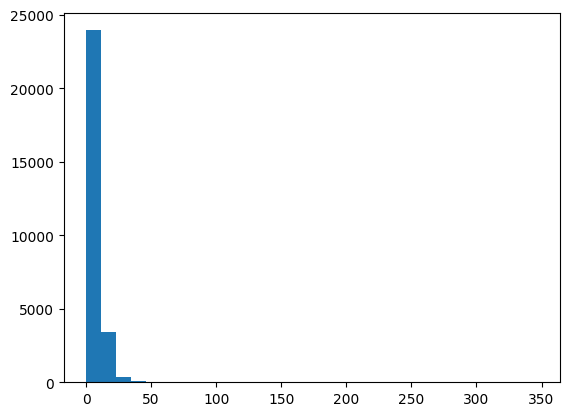

In [207]:
plt.hist(mRNA_half_life[mRNA_half_life < 1000], bins = 30)

## protein half-life

Data source:

- Eden et al 2011
- Schwanhausser et al 2011


In [44]:
schwan_mRNA_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/schwanhäusser2011global_supp_table_3.xls')
schwan_mRNA_half_life =  schwan_mRNA_half_life.dropna()
schwan_mRNA_half_life
protein_half_life = schwan_mRNA_half_life['Protein half-life experiment [h]']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_schwan_1 = protein_half_life

protein_half_life = schwan_mRNA_half_life['Protein half-life replicate [h]']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_schwan_2 = protein_half_life

Mean: 56.83778890160183
1st Quartile: 24.66
Median: 44.95
3rd Quartile: 75.69
Standard Deviation: 45.83951015589958
Minimum: 0.55
Maximum: 295.28
Mean: 105.90046624713959
1st Quartile: 24.36
Median: 48.31
3rd Quartile: 90.7675
Standard Deviation: 648.0637622943186
Minimum: 0.44
Maximum: 34357.0


In [45]:
eden_protein_half_life = pd.read_excel('/home/mzo5929/Keerthana/grnInference/parameter_data/eden2011proteome_excel.xlsx')
# eden_protein_half_life =  eden_protein_half_life.dropna()
eden_protein_half_life
protein_half_life = eden_protein_half_life['Protein Half-life (1/hr)']
print("Mean:", protein_half_life.mean())
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())
protein_half_life_eden = protein_half_life

Mean: 8.939
1st Quartile: 5.574999999999999
Median: 8.2
3rd Quartile: 11.1
Standard Deviation: 4.591139798183525
Minimum: 0.8
Maximum: 22.5


In [46]:
#Merge the all the lists to calculate the combined stats
protein_half_life = pd.concat([protein_half_life_eden, protein_half_life_schwan_2, protein_half_life_schwan_1], ignore_index=True)
print("Mean:", protein_half_life.mean())
print("5th percentile:", protein_half_life.quantile(0.05))
print("1st Quartile:", protein_half_life.quantile(0.25))
print("Median:", protein_half_life.median())
print("3rd Quartile:", protein_half_life.quantile(0.75))
print("9th percentile:", protein_half_life.quantile(0.95))
print("Standard Deviation:", protein_half_life.std())
print("Minimum:", protein_half_life.min())
print("Maximum:", protein_half_life.max())


Mean: 80.34783417935702
5th percentile: 7.89
1st Quartile: 23.7575
Median: 45.56
3rd Quartile: 81.3575
9th percentile: 196.25599999999986
Standard Deviation: 456.84196851441567
Minimum: 0.44
Maximum: 34357.0


(array([2.649e+03, 2.079e+03, 1.091e+03, 5.020e+02, 2.780e+02, 1.450e+02,
        9.900e+01, 5.400e+01, 4.500e+01, 2.800e+01, 1.200e+01, 1.800e+01,
        8.000e+00, 4.000e+00, 9.000e+00, 4.000e+00, 1.000e+01, 4.000e+00,
        6.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 1.000e+00]),
 array([4.40000000e-01, 3.34263333e+01, 6.64126667e+01, 9.93990000e+01,
        1.32385333e+02, 1.65371667e+02, 1.98358000e+02, 2.31344333e+02,
        2.64330667e+02, 2.97317000e+02, 3.30303333e+02, 3.63289667e+02,
        3.96276000e+02, 4.29262333e+02, 4.62248667e+02, 4.95235000e+02,
        5.28221333e+02, 5.61207667e+02, 5.94194000e+02, 6.27180333e+02,
        6.60166667e+02, 6.93153000e+02, 7.26139333e+02, 7.59125667e+02,
        7.92112000e+02, 8.25098333e+02, 8.58084667e+02, 8.91071000e+02,
        9.24057333e+02, 9.57043667e+02, 9.90030000e+02]),
 <BarContainer object of 30 artists>)

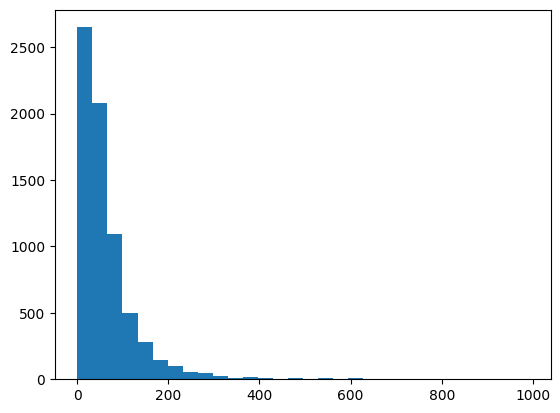

In [205]:
plt.hist(protein_half_life[protein_half_life < 1000], bins = 30)

In [200]:
import os
import re
from glob import glob

# Folder containing the files
folder = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/A_to_B/"

# Get all matching CSV files
all_files = glob(os.path.join(folder, "df_*.csv"))

# Pattern to extract row numbers
pattern = re.compile(r"row_(\d+_\d+)")

# Extract and collect unique row identifiers
unique_rows = set()
for file in all_files:
    match = pattern.search(file)
    if match:
        unique_rows.add(match.group(1))

# Print results
print(f"Total files: {len(all_files)}")
print(f"Unique row combinations: {len(unique_rows)}")
print("Examples:", list(unique_rows)[:10])  # optional: print some examples


Total files: 11030
Unique row combinations: 11025
Examples: ['21286_21287', '23378_23379', '21746_21747', '18224_18225', '4986_4987', '21404_21405', '16946_16947', '6240_6241', '19830_19831', '3020_3021']


In [201]:
import os
import re
from glob import glob

# Folder containing the files
folder = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/both_reg"

# Get all matching CSV files
all_files = glob(os.path.join(folder, "df_*.csv"))

# Pattern to extract row numbers
pattern = re.compile(r"row_(\d+_\d+)")

# Extract and collect unique row identifiers
unique_rows = set()
for file in all_files:
    match = pattern.search(file)
    if match:
        unique_rows.add(match.group(1))

# Print results
print(f"Total files: {len(all_files)}")
print(f"Unique row combinations: {len(unique_rows)}")
print("Examples:", list(unique_rows)[:10])  # optional: print some examples


Total files: 4396
Unique row combinations: 4391
Examples: ['11082_11083', '13758_13759', '474_475', '6562_6563', '6330_6331', '6240_6241', '5280_5281', '4986_4987', '3020_3021', '9648_9649']


In [202]:
import os
import re
from glob import glob

# Folder containing the files
folder = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/neg_reg"

# Get all matching CSV files
all_files = glob(os.path.join(folder, "df_*.csv"))

# Pattern to extract row numbers
pattern = re.compile(r"row_(\d+_\d+)")

# Extract and collect unique row identifiers
unique_rows = set()
for file in all_files:
    match = pattern.search(file)
    if match:
        unique_rows.add(match.group(1))

# Print results
print(f"Total files: {len(all_files)}")
print(f"Unique row combinations: {len(unique_rows)}")
print("Examples:", list(unique_rows)[:10])  # optional: print some examples


Total files: 24201
Unique row combinations: 12637
Examples: ['8882_8883', '21286_21287', '23378_23379', '21746_21747', '18224_18225', '21404_21405', '4986_4987', '16946_16947', '19830_19831', '6240_6241']


In [203]:
import os
import re
from glob import glob

# Folder containing the files
folder = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/no_reg"

# Get all matching CSV files
all_files = glob(os.path.join(folder, "df_*.csv"))

# Pattern to extract row numbers
pattern = re.compile(r"row_(\d+_\d+)")

# Extract and collect unique row identifiers
unique_rows = set()
for file in all_files:
    match = pattern.search(file)
    if match:
        unique_rows.add(match.group(1))

# Print results
print(f"Total files: {len(all_files)}")
print(f"Unique row combinations: {len(unique_rows)}")
print("Examples:", list(unique_rows)[:10])  # optional: print some examples


Total files: 17084
Unique row combinations: 12011
Examples: ['8882_8883', '21286_21287', '23378_23379', '21746_21747', '18224_18225', '4986_4987', '16946_16947', '21404_21405', '19830_19831', '6240_6241']


# Parameter generation


In [28]:
import os
import re
from glob import glob

# Folder containing the files
folder = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation_run_0/A_to_B/"

# Get all matching CSV files
all_files = glob(os.path.join(folder, "df_*.csv"))

# Pattern to extract row numbers
pattern = re.compile(r"row_(\d+_\d+)")

# Extract and collect unique row identifiers
unique_rows = set()
for file in all_files:
    match = pattern.search(file)
    if match:
        unique_rows.add(match.group(1))

# Print results
print(f"Total files: {len(all_files)}")
print(f"Unique row combinations: {len(unique_rows)}")
print("Examples:", list(unique_rows)[:10])  # optional: print some examples


Total files: 11039
Unique row combinations: 11034
Examples: ['15678_15679', '12996_12997', '21678_21679', '9230_9231', '7502_7503', '13858_13859', '11006_11007', '13566_13567', '7970_7971', '18436_18437']


In [2]:
from scipy.stats import qmc
import pandas as pd
import numpy as np

Generated 25000 samples


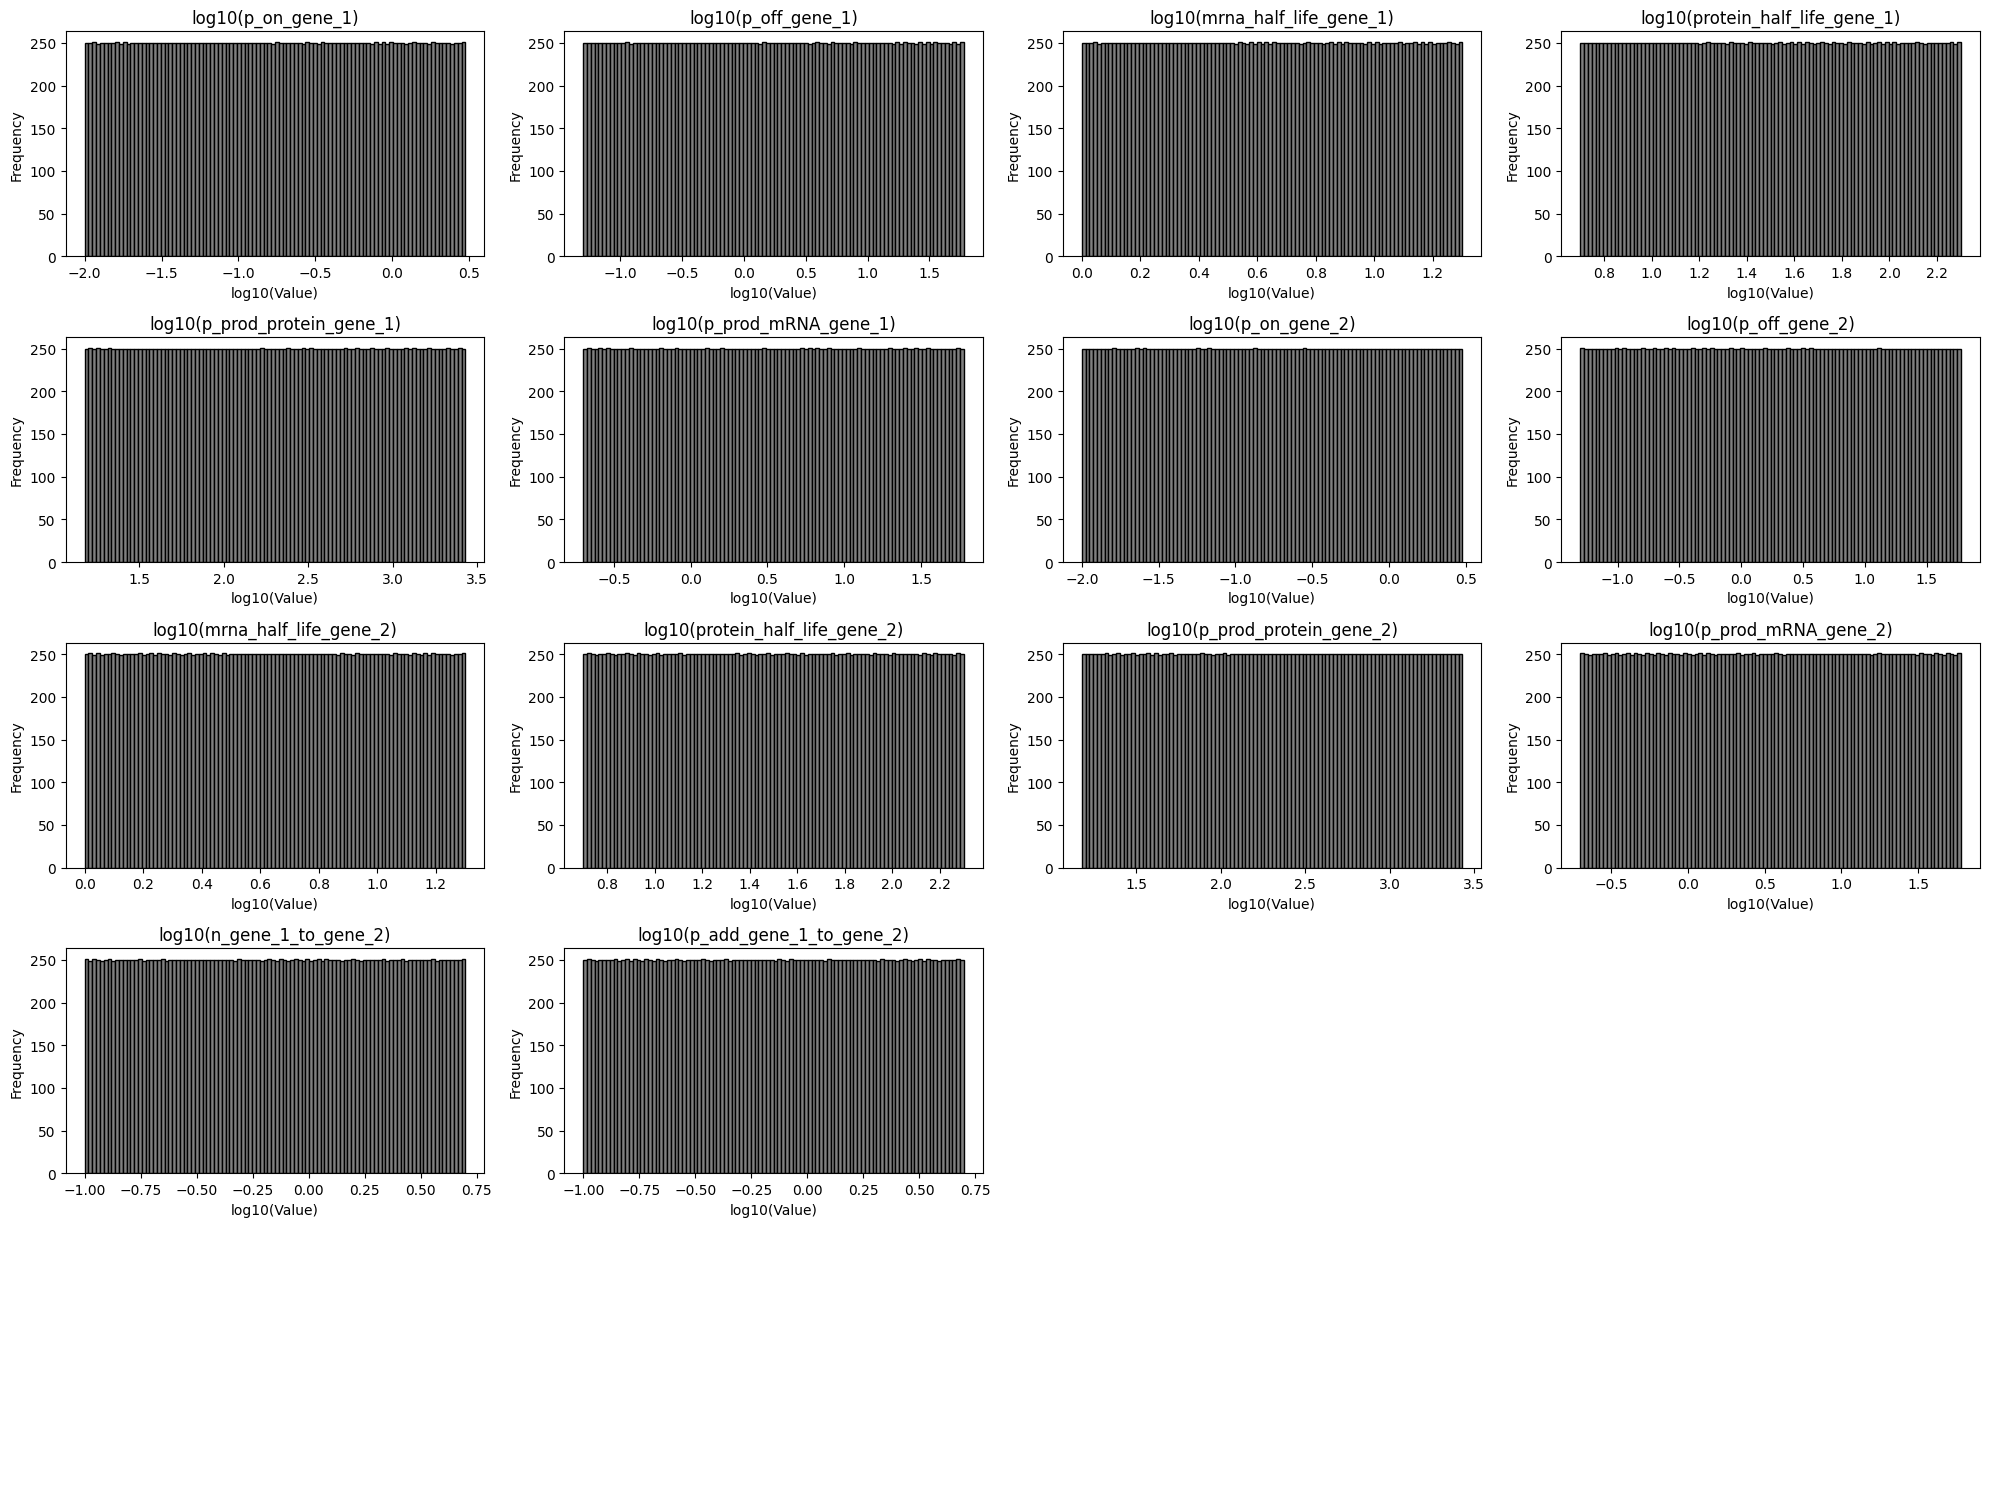


✅ Saved to /home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_negative_reg_2.csv


In [8]:
# --- Define parameters ---
gene_params = [
    "p_on", "p_off", "mrna_half_life", "protein_half_life",
    "p_prod_protein", "p_prod_mRNA"
]
interaction_params = ["n_gene_1_to_gene_2", "p_add_gene_1_to_gene_2"]

param_names = (
    [f"{p}_gene_1" for p in gene_params] +
    [f"{p}_gene_2" for p in gene_params] +
    interaction_params
)

param_bounds = {
    "p_on": (0.01, 3),
    "p_off": (0.05, 60),
    "mrna_half_life": (1, 20),
    "protein_half_life": (5, 200),
    "p_prod_mRNA": (0.2, 60),
    "p_prod_protein": (15, 2700),
    "n_gene_1_to_gene_2": (0.1, 5),
    "p_add_gene_1_to_gene_2": (0.1, 5),
}

bounds = (
    [param_bounds[p] for p in gene_params] +
    [param_bounds[p] for p in gene_params] +
    [param_bounds[p] for p in interaction_params]
)

# --- Constraint function ---
def hl_to_deg(hl):
    return np.log(2) / hl

def check_constraint(row, suffix):
    p_on = row[f"p_on_{suffix}"]
    p_off = row[f"p_off_{suffix}"]
    prod_m = row[f"p_prod_mRNA_{suffix}"]
    prod_p = row[f"p_prod_protein_{suffix}"]
    deg_m = hl_to_deg(row[f"mrna_half_life_{suffix}"])
    deg_p = hl_to_deg(row[f"protein_half_life_{suffix}"])
    return (prod_m / deg_m) * (prod_p / deg_p) < 5*1e6

# --- Sampling ---
n_valid_required = 25000
oversample_factor = 1
n_attempts = int(n_valid_required * oversample_factor)
seed = 42

# Latin Hypercube Sampling
# Convert bounds to log10 space
log_bounds_lower = [np.log10(b[0]) for b in bounds]
log_bounds_upper = [np.log10(b[1]) for b in bounds]

# Latin Hypercube Sampling in log space
sampler = qmc.LatinHypercube(d=len(bounds), seed=seed)
sample = sampler.random(n=n_attempts)

# Scale sample in log space
scaled_log_sample = qmc.scale(sample, log_bounds_lower, log_bounds_upper)

# Convert back to linear space
scaled_samples = 10 ** scaled_log_sample

# Create DataFrame
df = pd.DataFrame(scaled_samples, columns=param_names)


# Filter valid samples
df_valid = df #[valid_mask]

# --- Print acceptance stats ---
print(f"Generated {n_attempts} samples")

# Ensure enough valid samples
if len(df_valid) < n_valid_required:
    raise ValueError(f"Only {len(df_valid)} valid samples found. Increase oversample_factor or relax constraint.")

# Keep only first 25,000 valid
df_valid = df_valid.iloc[:n_valid_required].reset_index(drop=True)

import matplotlib.pyplot as plt

# Plot histograms of all parameters in df_valid
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df_valid.columns):
    axes[i].hist(np.log10(df_valid[col]), bins=100, color='gray', edgecolor='black')
    axes[i].set_title(f"log10({col})")
    axes[i].set_ylabel("Frequency")
    axes[i].set_xlabel("log10(Value)")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


# --- Expand to long format ---
rows = []
for idx, row in df_valid.iterrows():
    g1 = {k.replace("_gene_1", ""): v for k, v in row.items() if "_gene_1" in k and "_gene_2" not in k}
    g2 = {k.replace("_gene_2", ""): v for k, v in row.items() if "_gene_2" in k and "_gene_1" not in k}
    interaction = {k: v for k, v in row.items() if "gene_1_to_gene_2" in k}
    rows.append({**g1, **interaction, "pair_id": idx, "gene_id": 1})
    rows.append({**g2, **interaction, "pair_id": idx, "gene_id": 2})

final_df = pd.DataFrame(rows).reset_index(drop=True)

# --- Save ---
output_path = "/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_negative_reg_2.csv"
final_df.to_csv(output_path, index=True)
print(f"\n✅ Saved to {output_path}")


In [49]:
df[valid_mask]

,p_on_gene_1,p_off_gene_1,mrna_half_life_gene_1,protein_half_life_gene_1,p_prod_protein_gene_1,p_prod_mRNA_gene_1,p_on_gene_2,p_off_gene_2,mrna_half_life_gene_2,protein_half_life_gene_2,p_prod_protein_gene_2,p_prod_mRNA_gene_2,n_gene_1_to_gene_2,p_add_gene_1_to_gene_2
1,0.841158,5.998087,0.707385,34.385149,324.798331,1.415396,0.144185,48.198937,4.931538,10.083642,138.375030,0.357794,1.197299,0.109425
2,0.017928,8.641677,1.300051,63.944689,344.678293,3.178124,1.093509,4.901142,1.907259,20.737037,31.896413,14.606230,4.344915,0.466115
3,2.557942,30.594441,0.340811,7.530043,20.776338,7.162502,1.649123,0.286776,9.763466,5.587513,26.163573,115.872512,1.764364,0.221135
4,0.231447,4.351628,1.530696,18.573314,429.523102,2.647586,0.483599,1.461733,5.722282,7.270829,328.363793,62.592790,0.249740,0.294826
5,0.914044,17.262790,13.334961,7.172898,18.089865,188.312197,0.941543,5.956081,2.831232,10.234840,34.733365,1.425668,1.514918,1.632851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,2.552275,0.194473,14.989669,8.947624,73.370379,105.550827,1.221458,65.635682,11.134482,5.269224,18.671907,33.763663,0.623742,1.693347
24995,0.015000,12.164509,2.115864,18.759539,62.950194,0.108716,0.357983,0.740340,21.938215,81.954836,11.204759,6.574214,0.137651,0.187489
24996,0.033195,0.198017,0.937457,7.059721,33.656817,4.397216,0.086278,3.863533,2.383815,19.404012,176.204211,0.248423,1.004481,0.643666
24997,0.259253,0.692781,1.919013,19.329191,77.773280,50.696790,0.082769,32.301893,1.991387,86.273339,399.021435,1.315561,0.198474,1.870500


In [14]:
# param_df = pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_negative_reg.csv", index_col = 0)
param_df = final_df #pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulation_data/gillespie_simulation/sim_details/lhc_sampled_parameters_negative_reg.csv", index_col = 0)

def hl_to_deg(hl):
    return np.log(2) / hl


p_on = param_df[f"p_on"]
p_off = param_df[f"p_off"]
prod_m = param_df[f"p_prod_mRNA"]
prod_p = param_df[f"p_prod_protein"]
deg_m = hl_to_deg(param_df[f"mrna_half_life"])
deg_p = hl_to_deg(param_df[f"protein_half_life"])
p_on_eff =  param_df[f"p_on"] + 0.5*param_df['p_add_gene_1_to_gene_2']

param_df['mean_mRNA_level'] = (p_on_eff/(p_on_eff + p_off))*prod_m/deg_m
param_df['mean_protein_level'] = (p_on_eff/(p_on_eff + p_off))*(prod_m/deg_m)*(prod_p/deg_p)


In [16]:
p_on_eff

0        1.319740
1        0.250213
2        0.895134
3        0.198161
4        0.202789
           ...   
49995    0.684606
49996    0.188367
49997    0.097607
49998    2.192209
49999    2.258152
Length: 50000, dtype: float64

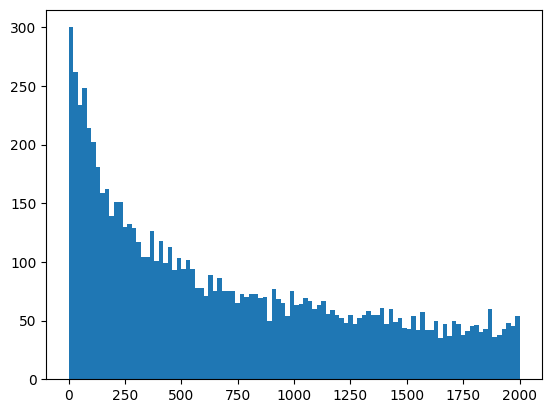

In [22]:
plt.hist(param_df[param_df['mean_protein_level'] < 2000]['mean_protein_level'], bins = 100)
plt.show()

In [26]:
param_df[param_df['mean_mRNA_level'] < 100].shape

(45239, 12)

(array([17681.,  4090.,  2459.,  1708.,  1435.,  1110.,   923.,   839.,
          704.,   619.]),
 array([6.02237193e-06, 1.00004359e-01, 2.00002695e-01, 3.00001031e-01,
        3.99999367e-01, 4.99997704e-01, 5.99996040e-01, 6.99994376e-01,
        7.99992712e-01, 8.99991049e-01, 9.99989385e-01]),
 <BarContainer object of 10 artists>)

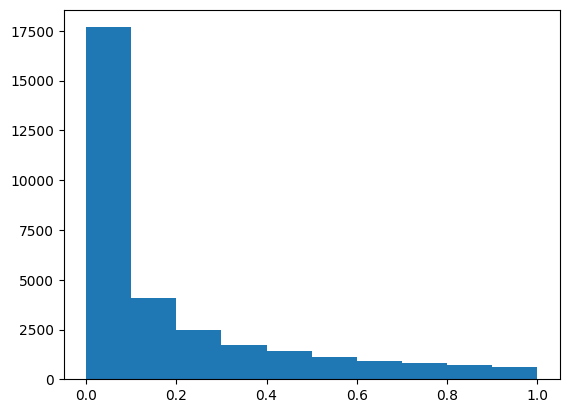

In [42]:
plt.hist(param_df[param_df['mean_mRNA_level'] < 1]['mean_mRNA_level'])